In [1]:


from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/dataset/kaggle/

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/dataset/kaggle/"

In [5]:
!kaggle datasets download -d jangedoo/utkface-new

100% 331M/331M [00:03<00:00, 91.0MB/s]
100% 331M/331M [00:03<00:00, 95.1MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [8]:
width=height=100
batch_size=32

In [9]:
images=[]#X
ages=[]#Y



for image_name in os.listdir("/content/drive/MyDrive/dataset/kaggle/UTKFace"):
 
  age=int(image_name.split('_')[0])
  ages.append(age)

  image=cv2.imread(f'/content/drive/MyDrive/dataset/kaggle/UTKFace/{image_name}')
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(width,height))
  images.append(image)





In [10]:
print(len(images))

23708


In [11]:
images=pd.Series(images,name='Images')
ages=pd.Series(ages,name='Ages')

dataframe=pd.concat([images,ages],axis=1)
dataframe.head()

,Images,Ages
0,"[[[213, 204, 199], [204, 195, 190], [205, 196,...",100
1,"[[[120, 124, 135], [123, 127, 138], [122, 126,...",100
2,"[[[229, 232, 236], [228, 233, 242], [225, 234,...",100
3,"[[[78, 82, 93], [78, 82, 93], [78, 82, 93], [7...",100
4,"[[[66, 70, 81], [68, 72, 83], [68, 72, 83], [6...",100


100


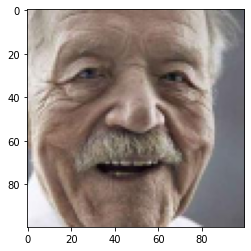

In [12]:
print(dataframe["Ages"][0])
plt.imshow(dataframe["Images"][0])
plt.show()

100


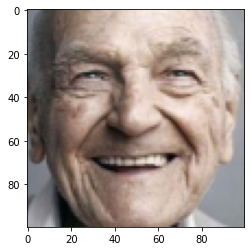

In [13]:
print(dataframe["Ages"][1])
plt.imshow(dataframe["Images"][1])
plt.show()


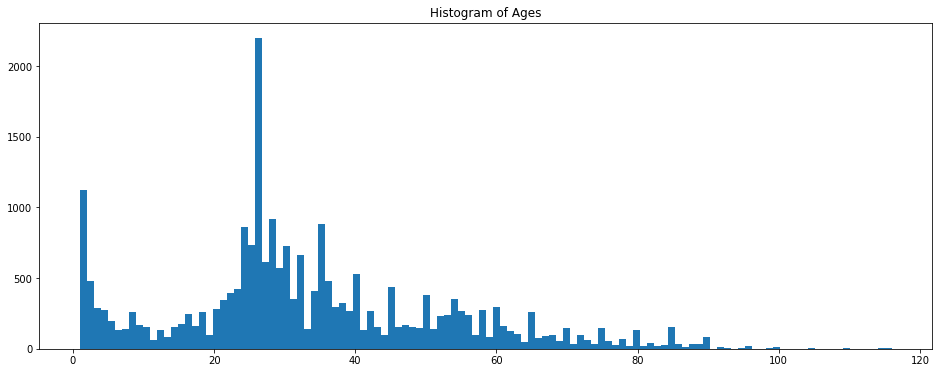

In [14]:
plt.figure(figsize=(16,6))
plt.hist(dataframe["Ages"],bins=dataframe["Ages"].max())
plt.title("Histogram of Ages")
plt.show()

In [15]:
under_26=dataframe[dataframe["Ages"]<=26]
under_26_new=under_26.sample(frac=0.3)

up_26=dataframe[dataframe["Ages"]>26]
dataframe=pd.concat([under_26_new,up_26],axis=0)


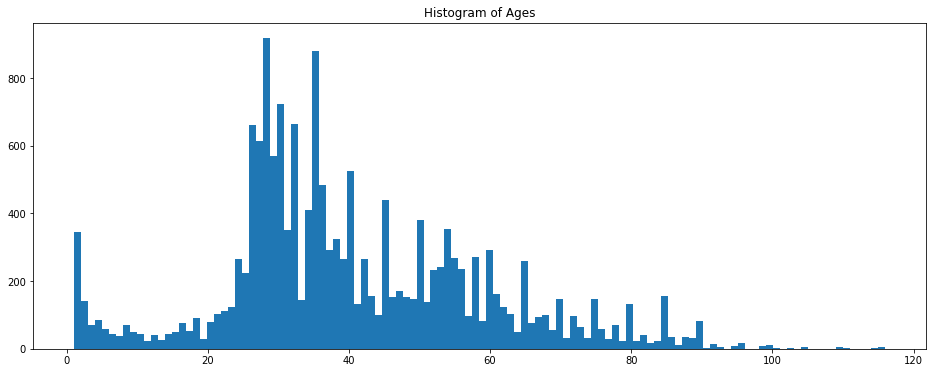

In [16]:
plt.figure(figsize=(16,6))
plt.hist(dataframe["Ages"],bins=dataframe["Ages"].max())
plt.title("Histogram of Ages")
plt.show()

In [17]:
dataframe=dataframe[dataframe["Ages"]<80]

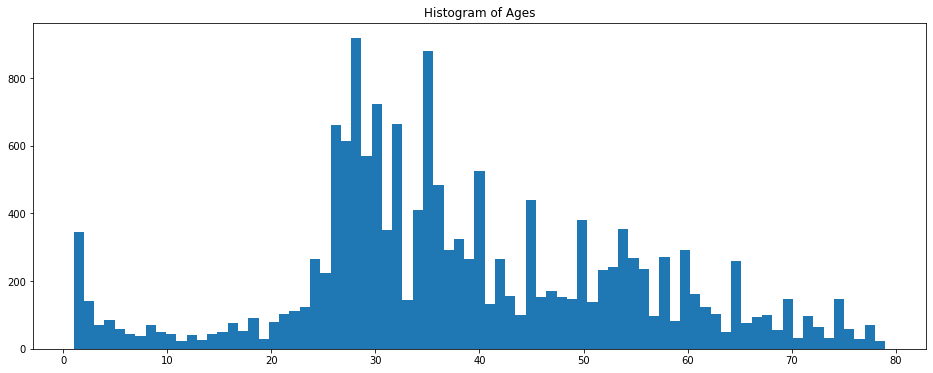

In [18]:
plt.figure(figsize=(16,6))
plt.hist(dataframe["Ages"],bins=dataframe["Ages"].max())
plt.title("Histogram of Ages")
plt.show()

In [19]:
X=np.array(dataframe["Images"].values.tolist())
Y=np.array(dataframe["Ages"].values.tolist())


In [20]:
print(X.shape)
print(Y.shape)

(16151, 100, 100, 3)
(16151,)


In [21]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

In [22]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(12920, 100, 100, 3)
(3231, 100, 100, 3)
(12920,)
(3231,)


In [23]:
idg=ImageDataGenerator(rescale=1./255,
                       horizontal_flip=True)
train_data=idg.flow(X_train,Y_train,batch_size=batch_size)
val_data=idg.flow(X_val,Y_val,batch_size=batch_size)

In [24]:
base_model=tf.keras.applications.ResNet50(
    input_shape=(width,height,3),
    weights='imagenet',
    include_top=False,
    pooling='avg'

)

94781440/94765736 [==============================] - 1s 0us/step


In [26]:
model=tf.keras.Sequential([
      base_model,
      layers.Flatten(),
      Dropout(0.2),
      Dense(1,activation='relu'),
     
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [28]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.mae
              )

In [29]:
output=model.fit(train_data,validation_data=val_data,
          epochs=20)

Epoch 1/20
404/404 [==============================] - 124s 262ms/step - loss: 23.0332 - val_loss: 57.0880
Epoch 2/20
404/404 [==============================] - 103s 256ms/step - loss: 7.0267 - val_loss: 14.1085
Epoch 3/20
404/404 [==============================] - 103s 256ms/step - loss: 6.0595 - val_loss: 6.1229
Epoch 4/20
404/404 [==============================] - 103s 255ms/step - loss: 5.5740 - val_loss: 5.8772
Epoch 5/20
404/404 [==============================] - 103s 255ms/step - loss: 5.2554 - val_loss: 5.8381
Epoch 6/20
404/404 [==============================] - 103s 255ms/step - loss: 4.8964 - val_loss: 5.7715
Epoch 7/20
404/404 [==============================] - 103s 255ms/step - loss: 4.7081 - val_loss: 5.7525
Epoch 8/20
404/404 [==============================] - 103s 256ms/step - loss: 4.5259 - val_loss: 5.7983
Epoch 9/20
404/404 [==============================] - 103s 256ms/step - loss: 4.2561 - val_loss: 6.0767
Epoch 10/20
404/404 [==============================] - 103s 2

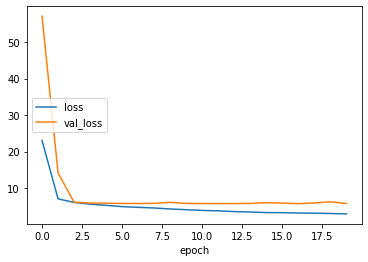

In [30]:

plt.plot(output.history['loss'],label='train_loss')
plt.plot(output.history["val_loss"], label="val_loss")
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='center left')
plt.show()


In [ ]:
model.save('AgePrediction.h5')

In [41]:
#testing the model with an image
image=cv2.imread('/content/little-girl-7.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(width,height))
image=image/255.0
image=image[np.newaxis,...]

result=model.predict(image)
print(result)

[[17.559984]]
